In [442]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [24]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Features cleaning

In [102]:
def print_percentages(array):
    for j in range(array.shape[1]):
        count_col = 0
        for i in range(array.shape[0]):
            if array[i,j] == -999:
                count_col += 1
        count_col = (count_col/array.shape[0])*100
        print(f'For the feature {j+1} : {count_col} % of missing values')

In [576]:
# standardize the matrix (not affected by undetermined values)
def standardize(tX, affected = False) :
    tX_standardized = tX.copy()
    for feature in tX_standardized.T : 
        mask = (feature != -999)
        i_mask = (feature == -999)
        if affected :
            feature[i_mask] = feature[mask].mean() # replace undetermined value by 0
            feature[:] = (feature-feature.mean())/feature.std() # standardize
        else :
            feature[i_mask] = 0 # replace undetermined value by mean of column
            feature[mask] = (feature[mask]-feature[mask].mean())/feature[mask].std() # standardize
    tX_standardized.T[22] = tX.T[22]
    tX_standardized = np.c_[tX_standardized, np.ones((tX.shape[0], 1))]
    return tX_standardized

In [577]:
# standardize the matrix (affected by undetermined values)
tX_standardized = standardize(tX)
tX_standardized_af = standardize(tX, affected = True)

In [458]:
# Create mask removing columns with unvalid data
remove_na_mask = []
for j in range(tX.shape[1]):
    remove_na_mask.append(not (-999 in tX[:,j]))
remove_na_mask.append(True) # for 1 column

In [459]:
# Create mask removing columns with unvalid data except the first one because it has only 15% on error
remove_error_mask = []
for j in range(tX.shape[1]):
    remove_error_mask.append(not (-999 in tX[:,j]))
remove_error_mask[0] = True
remove_error_mask.append(True) # for 1 column

In [498]:
# Create mask removing all columns with unvalid or 0 data
remove_all_mask = []
for j in range(tX.shape[1]):
    remove_all_mask.append(not (-999 in tX[:,j]))
remove_all_mask[29] = False
remove_all_mask[22] = False
remove_all_mask.append(True)

In [506]:
# Create manual mask based on observations
manual_mask = np.full(tX_standardized.shape[1] ,False)
# 0, 1, 2, 3, 7, 9, 16, 19, 21, 29
manual_mask[[7, 30]] = True

In [292]:
clean_cols = tX_standardized[:, remove_error_mask]

Feature  1


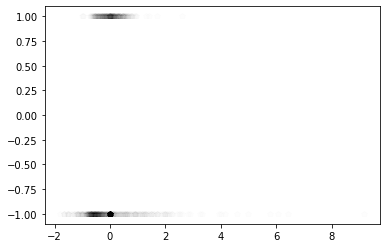

Feature  2


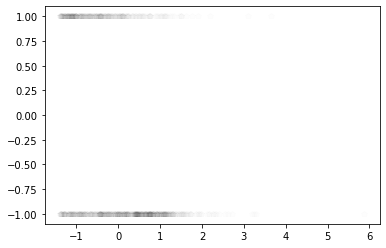

Feature  3


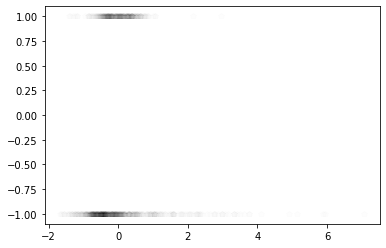

Feature  4


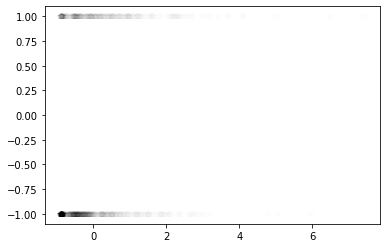

Feature  5


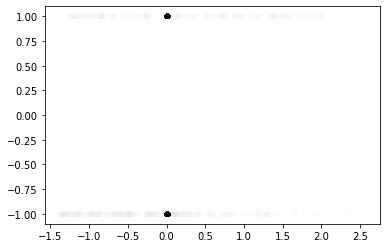

Feature  6


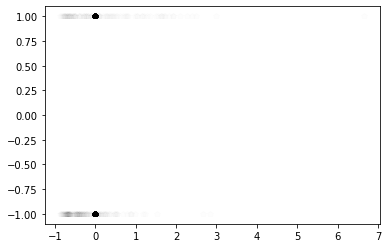

Feature  7


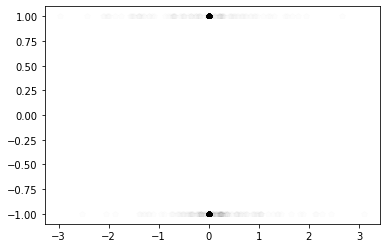

Feature  8


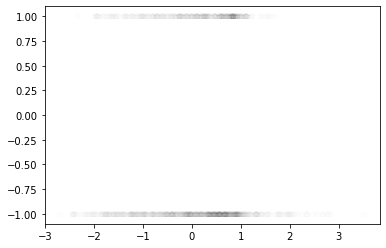

Feature  9


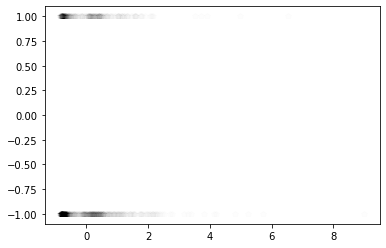

Feature  10


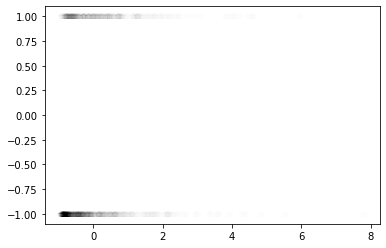

Feature  11


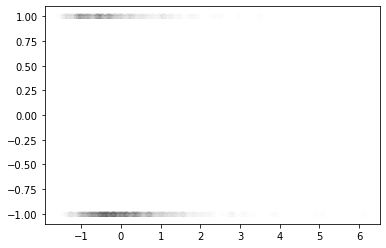

Feature  12


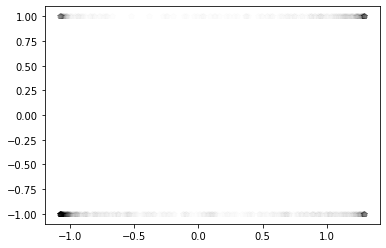

Feature  13


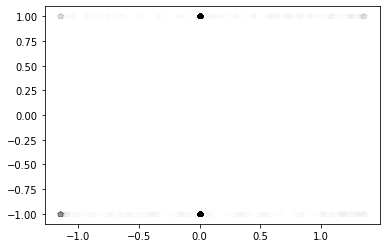

Feature  14


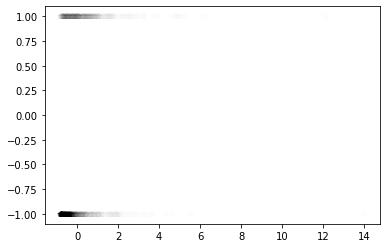

Feature  15


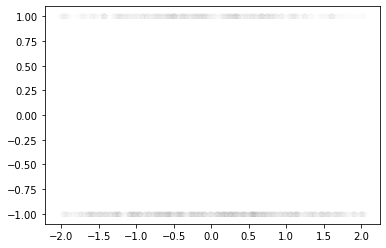

Feature  16


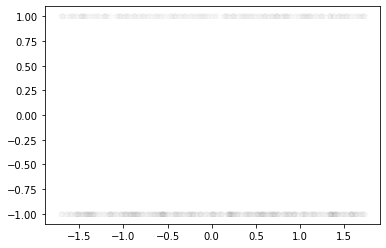

Feature  17


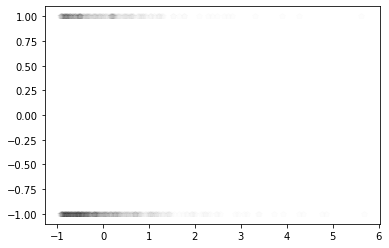

Feature  18


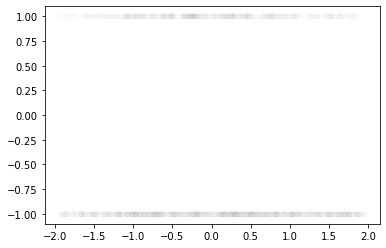

Feature  19


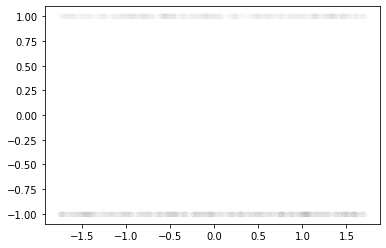

Feature  20


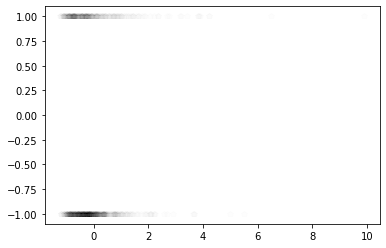

Feature  21


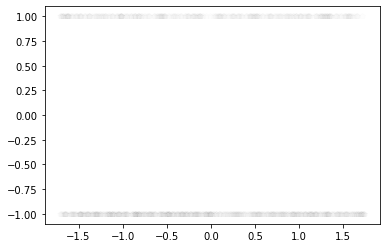

Feature  22


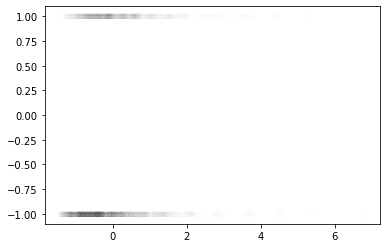

Feature  23


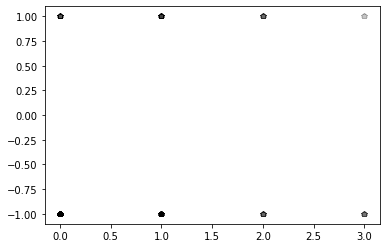

Feature  24


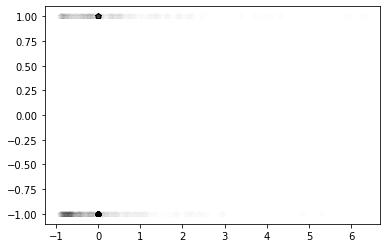

Feature  25


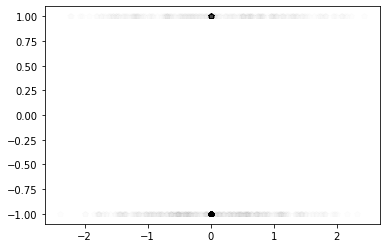

Feature  26


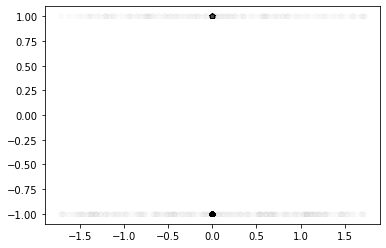

Feature  27


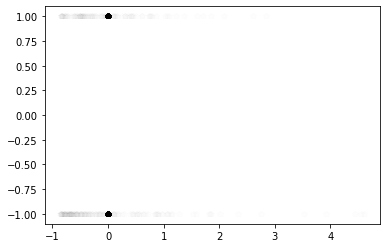

Feature  28


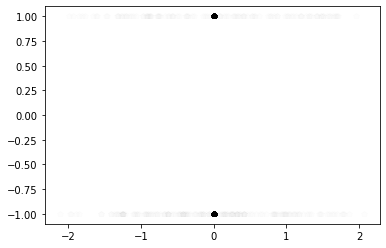

Feature  29


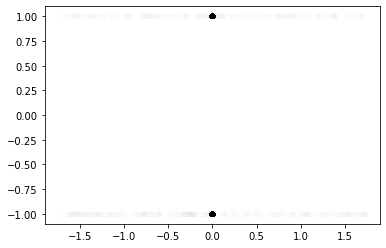

Feature  30


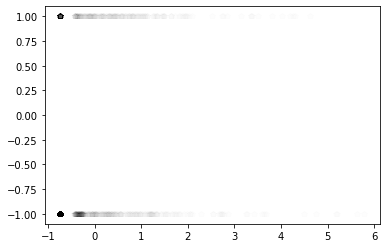

Feature  31


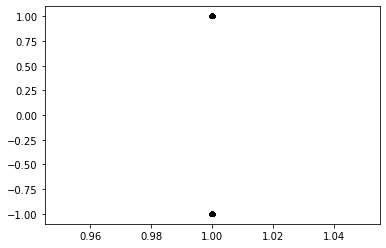

In [497]:
 for i, feature in enumerate(tX_standardized.T) :
    print("Feature " , i+1)
    plt.plot(feature[:1000], y[:1000], 'kp', alpha = 0.006)
    plt.show()

### Least squares with columns removed except the first one

In [293]:
tX_temp = tX_standardized[:, remove_error_mask]
initial_w = np.zeros(tX_temp.shape[1])
lambda_ = 50
weights, loss = least_squares(y, tX_temp)
# 0.729

[ 7.08857600e-03 -2.43302526e-01 -2.17501064e-01  2.26245355e-03
  2.46368227e-01 -2.79541103e-02 -4.43537328e+02 -1.90530411e-01
  1.84650059e-01  8.60730569e+01 -9.82652830e-04 -9.88798041e-04
  8.48395551e+01  1.06768311e-03  2.85590374e-03  5.86321062e-02
  9.48365178e-04 -6.98304497e-02 -2.26372605e-01  3.75921349e+02] 0.3710326238032113


In [295]:
w_0 = np.zeros(tX_standardized.shape()[1])
w_0[remove_error_mask] = weights
weights = w_0

### Logistic regression with columns removed

In [507]:
mask = manual_mask

In [566]:
tX_temp = tX_standardized_af
initial_w = np.zeros(tX_temp.shape[1])
x_train, x_test, y_train, y_test = split_data(tX_temp, y, 0.7, seed = 1)
weights, loss = logistic_regression(y, tX_temp, initial_w, 1000, 0.000001)
print(weights)

#

[ 2.58267765e-02 -6.85267338e-01 -1.01495128e+00  2.91998731e-01
 -3.11589633e-02  4.01266731e-01  4.16661756e-02  1.04064752e+00
 -9.14797437e-02  2.87061987e-01 -7.06948381e-01  2.50714125e-01
  2.19328298e-01  4.73925028e-01 -2.29059335e-03 -2.30463305e-03
  8.97754906e-01 -3.03452442e-03  6.84233625e-03  1.54091825e-01
  3.05476951e-04 -1.39990610e-01 -8.01590665e-02 -2.74284284e-01
  8.80844950e-04 -6.01861681e-04 -2.17767265e-01  5.67343756e-03
 -4.39140173e-03  2.84071572e-02 -8.05158341e-01]


In [562]:
y_pred = predict_labels(weights, x_test)
np.count_nonzero(y_test == y_pred) / (y_pred.shape[0])

0.7502133333333333

In [578]:
print(weights)

[ 2.58267765e-02 -6.85267338e-01 -1.01495128e+00  2.91998731e-01
 -3.11589633e-02  4.01266731e-01  4.16661756e-02  1.04064752e+00
 -9.14797437e-02  2.87061987e-01 -7.06948381e-01  2.50714125e-01
  2.19328298e-01  4.73925028e-01 -2.29059335e-03 -2.30463305e-03
  8.97754906e-01 -3.03452442e-03  6.84233625e-03  1.54091825e-01
  3.05476951e-04 -1.39990610e-01 -8.01590665e-02 -2.74284284e-01
  8.80844950e-04 -6.01861681e-04 -2.17767265e-01  5.67343756e-03
 -4.39140173e-03  2.84071572e-02 -8.05158341e-01]


In [567]:
w_0 = np.zeros(tX_temp.shape[1])
w_0[mask] = weights
weights = w_0

ValueError: NumPy boolean array indexing assignment cannot assign 31 input values to the 2 output values where the mask is true

## Generate predictions and save ouput in csv format for submission:

In [206]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [579]:
#standardize tX_test
tX_test_standardized = standardize(tX_test)
tX_test_standardized_af = standardize(tX_test, affected = True)

In [297]:
rmse_loss = compute_rmse(y, tX_standardized, weights)
mse_loss = compute_mse(y, tX_standardized, weights)
print('rmse ', rmse_loss)
print('mse ', mse_loss)
print('loss found ', loss)

rmse  0.8614320911171247
mse  0.37103262380321117
loss found  0.3710326238032113


In [580]:
OUTPUT_PATH = '../data/submission_file.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test_standardized_af)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)